In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/OR - 7.csv')
y['Fault'] = 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [4]:
train = X_train.append(y_train)
train

,DE,FE,Fault
103476,0.062585,0.041091,0
96984,-0.075102,-0.013765,0
114732,-0.048190,-0.001233,0
10916,0.069260,0.028558,0
37646,0.040054,0.065335,0
...,...,...,...
45891,-0.289947,0.012122,1
117952,0.007716,-0.063485,1
42613,0.190049,0.368175,1
43567,0.285074,0.216755,1


In [5]:
test = X_test.append(y_test)
test

,DE,FE,Fault
121079,0.046313,0.054651,0
107924,-0.015855,0.061636,0
22678,-0.065297,0.122862,0
55190,-0.112652,0.066978,0
92048,0.023991,0.034105,0
...,...,...,...
103358,-0.544564,-0.450356,1
54412,1.083036,-0.001233,1
50632,-1.123239,-0.382145,1
89251,-0.068629,0.092660,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [7]:
train = train.values.reshape(-1, 1, 3)

test  = test.values.reshape(-1, 1, 3)

In [8]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [9]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4608      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 3)              99        
Total params: 13,027
Trainable params: 13,027
Non-trainable params: 0
__________________________________________________

In [10]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Train on 174463 samples, validate on 19385 samples
Epoch 1/100
174463/174463 [==============================] - 6s 35us/step - loss: 0.1188 - accuracy: 0.5652 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 2/100
174463/174463 [==============================] - 3s 15us/step - loss: 0.0154 - accuracy: 0.8027 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 3/100
174463/174463 [==============================] - 3s 15us/step - loss: 0.0120 - accuracy: 0.8097 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 4/100
174463/174463 [==============================] - 3s 16us/step - loss: 0.0106 - accuracy: 0.8293 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 5/100
174463/174463 [==============================] - 3s 16us/step - loss: 0.0097 - accuracy: 0.8386 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 6/100
174463/174463 [==============================] - 3s 15us/step - loss: 0.0089 - accuracy: 0.8423 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 7/100
174463/174463 [======================

174463/174463 [==============================] - 4s 21us/step - loss: 0.0026 - accuracy: 0.9283 - val_loss: 3.7192e-04 - val_accuracy: 1.0000
Epoch 55/100
174463/174463 [==============================] - 4s 21us/step - loss: 0.0026 - accuracy: 0.9283 - val_loss: 3.6324e-04 - val_accuracy: 1.0000
Epoch 56/100
174463/174463 [==============================] - 4s 21us/step - loss: 0.0025 - accuracy: 0.9297 - val_loss: 3.2918e-04 - val_accuracy: 1.0000
Epoch 57/100
174463/174463 [==============================] - 4s 20us/step - loss: 0.0025 - accuracy: 0.9304 - val_loss: 3.2947e-04 - val_accuracy: 1.0000
Epoch 58/100
174463/174463 [==============================] - 4s 20us/step - loss: 0.0025 - accuracy: 0.9300 - val_loss: 3.0082e-04 - val_accuracy: 1.0000
Epoch 59/100
174463/174463 [==============================] - 4s 21us/step - loss: 0.0025 - accuracy: 0.9313 - val_loss: 3.2470e-04 - val_accuracy: 1.0000
Epoch 60/100
174463/174463 [==============================] - 4s 21us/step - loss: 

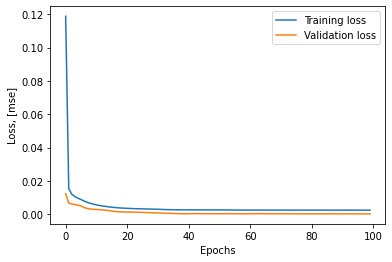

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.show()

In [12]:
pred_train = model.predict(train)

In [13]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

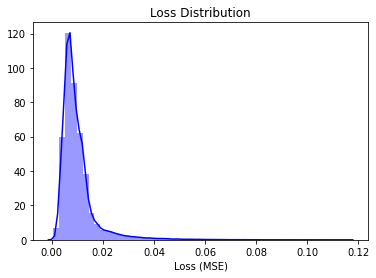

In [14]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
plt.title('Loss Distribution')
plt.xlabel('Loss (MSE)')
plt.show()

In [15]:
TH = 0.04
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [16]:
scored_train['Loss_mae'].mean()

0.009908624591632949

Text(0, 0.5, 'Loss (MAE)')

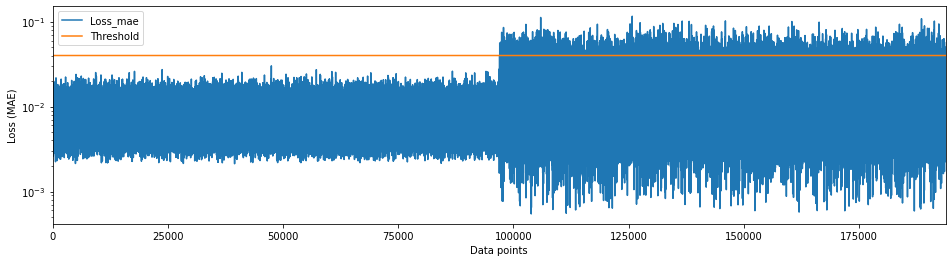

In [17]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [18]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.005119,0.04,False
1,0.007804,0.04,False
2,0.006469,0.04,False
3,0.005601,0.04,False
4,0.006689,0.04,False
...,...,...,...
193843,0.006832,0.04,False
193844,0.003804,0.04,False
193845,0.011817,0.04,False
193846,0.010906,0.04,False


In [19]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
97036   0.056260       0.04     True
97045   0.042579       0.04     True
97093   0.047422       0.04     True
97104   0.040912       0.04     True
97109   0.051299       0.04     True
...          ...        ...      ...
193615  0.051338       0.04     True
193645  0.045172       0.04     True
193676  0.041432       0.04     True
193778  0.040477       0.04     True
193840  0.040193       0.04     True

[2147 rows x 3 columns]
(2147, 3)


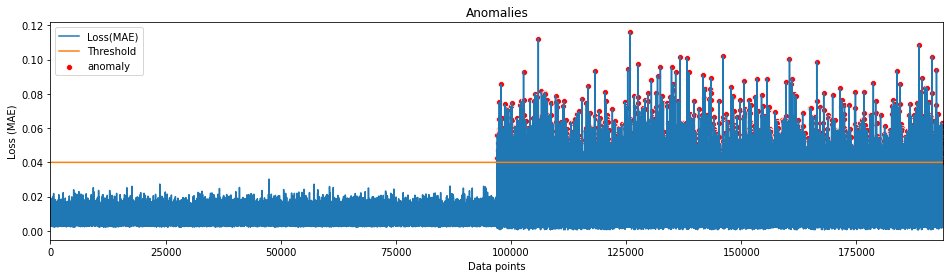

In [20]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [21]:
pred_test = model.predict(test)

In [22]:
score = model.evaluate(test,test)
score

48462/48462 [==============================] - 3s 63us/step


[0.00020161704332534696, 0.9468655586242676]

In [23]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

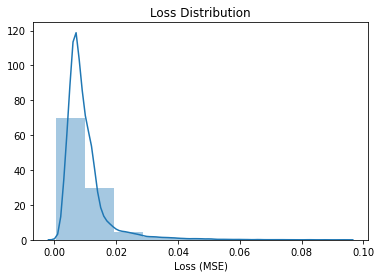

In [24]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
plt.title('Loss Distribution')
plt.xlabel('Loss (MSE)')
plt.show()

In [25]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.006020,0.04,False
1,0.005443,0.04,False
2,0.011151,0.04,False
3,0.009828,0.04,False
4,0.003202,0.04,False
...,...,...,...
48457,0.019631,0.04,False
48458,0.016547,0.04,False
48459,0.022773,0.04,False
48460,0.005291,0.04,False


In [26]:
scored_test['Loss_mae'].mean()

0.00991753333719216

Text(0, 0.5, 'Loss (MAE)')

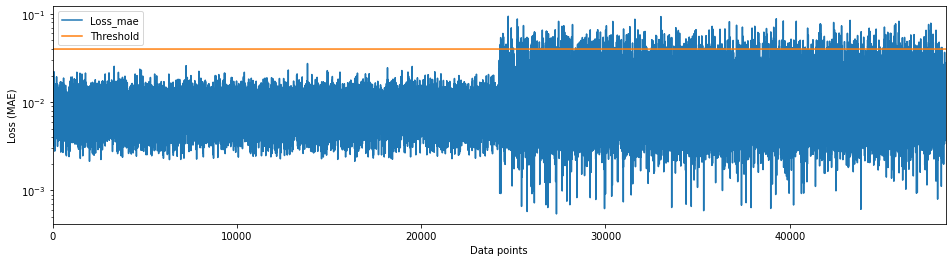

In [27]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [28]:
OR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(OR_anomalies)
print(OR_anomalies.shape)

       Loss_mae  Threshold  Anomaly
24292  0.045229       0.04     True
24310  0.053888       0.04     True
24331  0.043000       0.04     True
24364  0.046633       0.04     True
24386  0.050558       0.04     True
...         ...        ...      ...
47941  0.065391       0.04     True
47989  0.046150       0.04     True
48112  0.047827       0.04     True
48133  0.041874       0.04     True
48256  0.041769       0.04     True

[537 rows x 3 columns]
(537, 3)


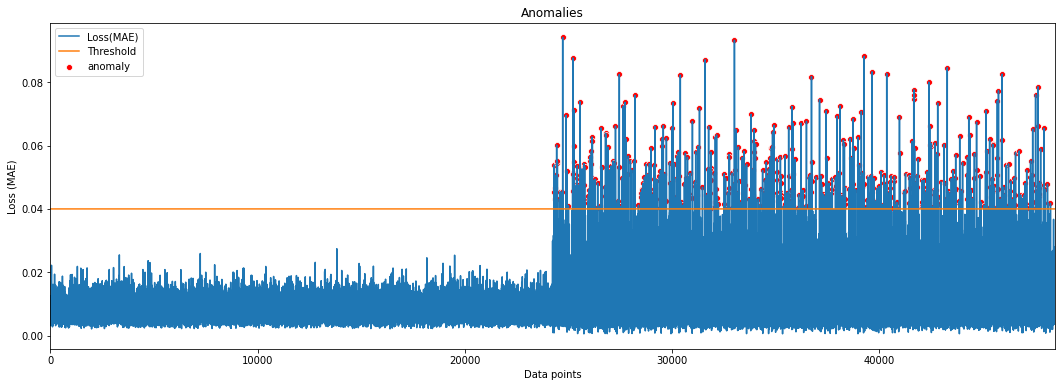

In [29]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=OR_anomalies.index , y=OR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [30]:
print(score[1])

0.9468655586242676


In [31]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 94.69%


In [32]:
print("Anomalies: {}".format(OR_anomalies['Anomaly'].count()))

Anomalies: 537
